In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [74]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

In [75]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=54)
raw_data

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4    1958   03     21259   1958.2027     315.71      314.43       316.20   
5    1958   04     21290   1958.2877     317.45      315.16       317.30   
6    1958   05     21320   1958.3699     317.51      314.70       317.88   
7    1958   06     21351   1958.4548     -99.99      -99.99       317.26   
8    1958   07     21381   1958.5370     315.87      315.20       315.85   
9    1958   08     21412   1958.6219     314.93      316.21       313.97   
10   1958   09     21443   1958.7068     313.21      316.11       312.44   
11   1958   10     21473   1958.7890     -99.99      -99.99       312.42   
12   1958   11     21504   1958.8740     313.33      315.21       313.60   
13   1958   12     21534   1958.9562     314.67      315.44       314.76   
14   1959   01     21565   1959.0411     315.58      315.52       315.64   
15   1959   02     21596   1959.1260     316.49      315.84       316.29   
16   1959   03     21624   1959.2027     316.65      315.37       316.99   
17   1959   04     21655   1959.2877     317.72      315.41       318.09   
18   1959   05     21685   1959.3699     318.29      315.47       318.67   
19   1959   06     21716   1959.4548     318.15      316.01       318.06   
20   1959   07     21746   1959.5370     316.54      315.87       316.67   
21   1959   08     21777   1959.6219     314.80      316.09       314.80   
22   1959   09     21808   1959.7068     313.84      316.74       313.30   
23   1959   10     21838   1959.7890     313.33      316.34       313.31   
24   1959   11     21869   1959.8740     314.81      316.70       314.53   
25   1959   12     21899   1959.9562     315.58      316.35       315.72   
26   1960   01     21930   1960.0410     316.43      316.37       316.62   
27   1960   02     21961   1960.1257     316.98      316.33       317.29   
28   1960   03     21990   1960.2049     317.58      316.27       318.04   
29   1960   04     22021   1960.2896     319.03      316.70       319.14   
..    ...  ...       ...         ...        ...         ...          ...   
752  2020   07     44027   2020.5383     414.42      413.65       414.75   
753  2020   08     44058   2020.6230     412.52      414.09       412.60   
754  2020   09     44089   2020.7077     411.18      414.68       410.91   
755  2020   10     44119   2020.7896     411.12      414.72       411.02   
756  2020   11     44150   2020.8743     412.88      415.14       412.56   
757  2020   12     44180   2020.9563     413.89      414.81       414.07   
758  2021   01     44211   2021.0411     415.15      415.08       415.23   
759  2021   02     44242   2021.1260     416.47      415.69       416.12   
760  2021   03     44270   2021.2027     417.16      415.62       417.04   
761  2021   04     44301   2021.2877     418.24      415.47       418.44   
762  2021   05     44331   2021.3699     418.95      415.56       419.21   
763  2021   06     44362   2021.4548     418.70      416.13       418.55   
764  2021   07     44392   2021.5370     416.65      415.85       416.94   
765  2021   08     44423   2021.6219     414.34      415.89       414.76   
766  2021   09     44454   2021.7068     412.91      416.40       413.03   
767  2021   10     44484   2021.7890     413.55      417.16       413.13   
768  2021   11     44515   2021.8740     414.82      417.09       414.67   
769  2021   12     44545   2021.9562     416.43      417.36       416.18   
770  2022   01     44576   2022.0411     418.01      417.94       417.34   
771  2022   02     44607   2022.1260     418.99      418.20       418.20   
772  2022   03     44635   2022.2027     418.45      41

In [76]:
data = raw_data.dropna().copy()
data = data.iloc[2:]
data

Yr   Mn      Date        Date        CO2 seasonally          fit  \
2    1958   01     21200   1958.0411     -99.99     -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99     -99.99       -99.99   
4    1958   03     21259   1958.2027     315.71     314.43       316.20   
5    1958   04     21290   1958.2877     317.45     315.16       317.30   
6    1958   05     21320   1958.3699     317.51     314.70       317.88   
7    1958   06     21351   1958.4548     -99.99     -99.99       317.26   
8    1958   07     21381   1958.5370     315.87     315.20       315.85   
9    1958   08     21412   1958.6219     314.93     316.21       313.97   
10   1958   09     21443   1958.7068     313.21     316.11       312.44   
11   1958   10     21473   1958.7890     -99.99     -99.99       312.42   
12   1958   11     21504   1958.8740     313.33     315.21       313.60   
13   1958   12     21534   1958.9562     314.67     315.44       314.76   
14   1959   01     21565   1959.0411     315.58     315.52       315.64   
15   1959   02     21596   1959.1260     316.49     315.84       316.29   
16   1959   03     21624   1959.2027     316.65     315.37       316.99   
17   1959   04     21655   1959.2877     317.72     315.41       318.09   
18   1959   05     21685   1959.3699     318.29     315.47       318.67   
19   1959   06     21716   1959.4548     318.15     316.01       318.06   
20   1959   07     21746   1959.5370     316.54     315.87       316.67   
21   1959   08     21777   1959.6219     314.80     316.09       314.80   
22   1959   09     21808   1959.7068     313.84     316.74       313.30   
23   1959   10     21838   1959.7890     313.33     316.34       313.31   
24   1959   11     21869   1959.8740     314.81     316.70       314.53   
25   1959   12     21899   1959.9562     315.58     316.35       315.72   
26   1960   01     21930   1960.0410     316.43     316.37       316.62   
27   1960   02     21961   1960.1257     316.98     316.33       317.29   
28   1960   03     21990   1960.2049     317.58     316.27       318.04   
29   1960   04     22021   1960.2896     319.03     316.70       319.14   
30   1960   05     22051   1960.3716     320.03     317.20       319.69   
31   1960   06     22082   1960.4563     319.59     317.46       319.03   
..    ...  ...       ...         ...        ...        ...          ...   
752  2020   07     44027   2020.5383     414.42     413.65       414.75   
753  2020   08     44058   2020.6230     412.52     414.09       412.60   
754  2020   09     44089   2020.7077     411.18     414.68       410.91   
755  2020   10     44119   2020.7896     411.12     414.72       411.02   
756  2020   11     44150   2020.8743     412.88     415.14       412.56   
757  2020   12     44180   2020.9563     413.89     414.81       414.07   
758  2021   01     44211   2021.0411     415.15     415.08       415.23   
759  2021   02     44242   2021.1260     416.47     415.69       416.12   
760  2021   03     44270   2021.2027     417.16     415.62       417.04   
761  2021   04     44301   2021.2877     418.24     415.47       418.44   
762  2021   05     44331   2021.3699     418.95     415.56       419.21   
763  2021   06     44362   2021.4548     418.70     416.13       418.55   
764  2021   07     44392   2021.5370     416.65     415.85       416.94   
765  2021   08     44423   2021.6219     414.34     415.89       414.76   
766  2021   09     44454   2021.7068     412.91     416.40       413.03   
767  2021   10     44484   2021.7890     413.55     417.16       413.13   
768  2021   11     44515   2021.8740     414.82     417.09       414.67   
769  2021   12     44545   2021.9562     416.43     417.36       416.18   
770  2022   01     44576   2022.0411     418.01     417.94       417.34   
771  2022   02     44607   2022.1260     418.99     418.20       418.20   
772  2022   03     44635   2022.2027     418.45     416.91       419.11   
773  2022   04     44666   2022.

In [77]:
data['     CO2'] = data['     CO2'].astype(float)
data['seasonally'] = data['seasonally'].astype(float)

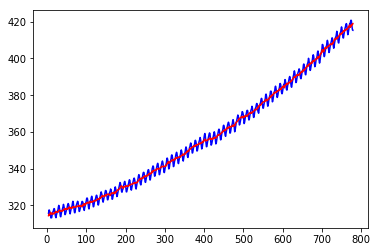

In [82]:
indexNames = data[ data['     CO2'] == (-99.99) ].index
data.drop(indexNames , inplace=True)
#sorted_data = data.set_index('      Date').sort_index()
#sorted_data['     CO2'].plot()
data['     CO2'].plot(color='b', label='CO2')
data['seasonally'].plot(color='r', label='seasonally')